In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

This script analyse this association rules find in the fifth version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'seq_patterns/testes/historical_rules_commit5_197reg_021.xlsx', keep_default_na=False)
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'Informix'}),0.025381,0.030457,0.025381,1.000000,32.833333,0.024608,inf,1,1
1,frozenset({'Informix'}),frozenset({'Firebird'}),0.030457,0.025381,0.025381,0.833333,32.833333,0.024608,5.847716,1,1
2,frozenset({'Firebird'}),frozenset({'SAP Adaptive Server'}),0.025381,0.060914,0.025381,1.000000,16.416667,0.023835,inf,1,1
3,frozenset({'SapHana'}),frozenset({'SAP Adaptive Server'}),0.025381,0.060914,0.025381,1.000000,16.416667,0.023835,inf,1,1
4,frozenset({'SAP Adaptive Server'}),frozenset({'Firebird'}),0.060914,0.025381,0.025381,0.416667,16.416667,0.023835,1.670776,1,1
...,...,...,...,...,...,...,...,...,...,...,...
273,frozenset({'H2'}),frozenset({'Ehcache'}),0.243655,0.182741,0.060914,0.250000,1.368056,0.016388,1.089679,1,1
274,frozenset({'MySQL'}),frozenset({'Ehcache'}),0.411168,0.182741,0.096447,0.234568,1.283608,0.021309,1.067709,1,1
275,frozenset({'Ehcache'}),frozenset({'MySQL'}),0.182741,0.411168,0.096447,0.527778,1.283608,0.021309,1.246939,1,1
276,frozenset({'Redis'}),frozenset({'MS SQL Server'}),0.152284,0.131980,0.025381,0.166667,1.262821,0.005282,1.041624,1,1


In [3]:
#df['antecedents'] = df['antecedents'].astype(str)
#df['consequents'] = df['consequents'].astype(str)

In [3]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,0.030457,0.025381,1.000000,32.833333,0.024608,inf,1,1
1,Informix,Firebird,0.030457,0.025381,0.025381,0.833333,32.833333,0.024608,5.847716,1,1
2,Firebird,SAP Adaptive Server,0.025381,0.060914,0.025381,1.000000,16.416667,0.023835,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,0.060914,0.025381,1.000000,16.416667,0.023835,inf,1,1
4,SAP Adaptive Server,Firebird,0.060914,0.025381,0.025381,0.416667,16.416667,0.023835,1.670776,1,1
...,...,...,...,...,...,...,...,...,...,...,...
273,H2,Ehcache,0.243655,0.182741,0.060914,0.250000,1.368056,0.016388,1.089679,1,1
274,MySQL,Ehcache,0.411168,0.182741,0.096447,0.234568,1.283608,0.021309,1.067709,1,1
275,Ehcache,MySQL,0.182741,0.411168,0.096447,0.527778,1.283608,0.021309,1.246939,1,1
276,Redis,MS SQL Server,0.152284,0.131980,0.025381,0.166667,1.262821,0.005282,1.041624,1,1


In [4]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,5.0,0.030457,6.0,0.025381,5.0,1.000000,32.833333,0.024608,inf,1,1
1,Informix,Firebird,0.030457,6.0,0.025381,5.0,0.025381,5.0,0.833333,32.833333,0.024608,5.847716,1,1
2,Firebird,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
4,SAP Adaptive Server,Firebird,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,H2,Ehcache,0.243655,48.0,0.182741,36.0,0.060914,12.0,0.250000,1.368056,0.016388,1.089679,1,1
274,MySQL,Ehcache,0.411168,81.0,0.182741,36.0,0.096447,19.0,0.234568,1.283608,0.021309,1.067709,1,1
275,Ehcache,MySQL,0.182741,36.0,0.411168,81.0,0.096447,19.0,0.527778,1.283608,0.021309,1.246939,1,1
276,Redis,MS SQL Server,0.152284,30.0,0.131980,26.0,0.025381,5.0,0.166667,1.262821,0.005282,1.041624,1,1


In [5]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,5.0,0.030457,6.0,0.025381,5.0,1.000000,32.833333,0.024608,inf,1,1
1,Informix,Firebird,0.030457,6.0,0.025381,5.0,0.025381,5.0,0.833333,32.833333,0.024608,5.847716,1,1
2,Firebird,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
4,SAP Adaptive Server,Firebird,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,H2,Ehcache,0.243655,48.0,0.182741,36.0,0.060914,12.0,0.250000,1.368056,0.016388,1.089679,1,1
274,MySQL,Ehcache,0.411168,81.0,0.182741,36.0,0.096447,19.0,0.234568,1.283608,0.021309,1.067709,1,1
275,Ehcache,MySQL,0.182741,36.0,0.411168,81.0,0.096447,19.0,0.527778,1.283608,0.021309,1.246939,1,1
276,Redis,MS SQL Server,0.152284,30.0,0.131980,26.0,0.025381,5.0,0.166667,1.262821,0.005282,1.041624,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [89]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
197,PostgreSQL,MySQL,0.248731,49.0,0.411168,81.0,0.223350,44.0,0.897959,2.183925,0.121080,5.770558,1,1
196,MySQL,PostgreSQL,0.411168,81.0,0.248731,49.0,0.223350,44.0,0.543210,2.183925,0.121080,1.644670,1,1
240,MySQL,H2,0.411168,81.0,0.243655,48.0,0.182741,36.0,0.444444,1.824074,0.082558,1.361421,1,1
241,H2,MySQL,0.243655,48.0,0.411168,81.0,0.182741,36.0,0.750000,1.824074,0.082558,2.355330,1,1
211,MySQL,Oracle,0.411168,81.0,0.218274,43.0,0.177665,35.0,0.432099,1.979615,0.087918,1.376517,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,MariaDB,Cassandra,0.116751,23.0,0.055838,11.0,0.025381,5.0,0.217391,3.893281,0.018862,1.206430,1,1
97,Cassandra,MariaDB,0.055838,11.0,0.116751,23.0,0.025381,5.0,0.454545,3.893281,0.018862,1.619289,1,1
102,Oracle,Informix,0.218274,43.0,0.030457,6.0,0.025381,5.0,0.116279,3.817829,0.018733,1.097115,1,1
103,Informix,Oracle,0.030457,6.0,0.218274,43.0,0.025381,5.0,0.833333,3.817829,0.018733,4.690355,1,1


In [90]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.411168,81.0,0.096226,18.956522,0.076142,15.000000,0.185185,2.006815,0.036577,1.131984,1.0,1.0
PostgreSQL,0.248731,49.0,0.106368,20.954545,0.067144,13.227273,0.269944,2.836579,0.040686,1.454370,1.0,1.0
H2,0.243655,48.0,0.114213,22.500000,0.059898,11.800000,0.245833,2.545042,0.032070,1.235423,1.0,1.0
Oracle,0.218274,43.0,0.125709,24.764706,0.068976,13.588235,0.316005,3.018079,0.041537,1.438750,1.0,1.0
Ehcache,0.182741,36.0,0.159898,31.500000,0.048646,9.583333,0.266204,1.899812,0.019426,1.158931,1.0,1.0
Redis,0.152284,30.0,0.131345,25.875000,0.045368,8.937500,0.297917,3.112965,0.025366,1.266139,1.0,1.0
MS SQL Server,0.131980,26.0,0.130785,25.764706,0.054046,10.647059,0.409502,4.067144,0.036785,3.469726,1.0,1.0
MariaDB,0.116751,23.0,0.155910,30.714286,0.046410,9.142857,0.397516,2.781077,0.028208,1.829583,1.0,1.0
SQLite,0.111675,22.0,0.146285,28.818182,0.043378,8.545455,0.388430,4.351964,0.027042,1.429399,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [10]:
rules1 = df2[(df2['consequent support'] >= 0.10)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.096226,18.956522,0.411168,81.0,0.076142,15.000000,0.825137,2.006815,0.036577,NaN,1.0,1.0
Oracle,0.125709,24.764706,0.218274,43.0,0.068976,13.588235,0.658769,3.018079,0.041537,NaN,1.0,1.0
PostgreSQL,0.106368,20.954545,0.248731,49.0,0.067144,13.227273,0.705545,2.836579,0.040686,NaN,1.0,1.0
H2,0.114213,22.500000,0.243655,48.0,0.059898,11.800000,0.620112,2.545042,0.032070,NaN,1.0,1.0
MS SQL Server,0.130785,25.764706,0.131980,26.0,0.054046,10.647059,0.536780,4.067144,0.036785,NaN,1.0,1.0
Ehcache,0.159898,31.500000,0.182741,36.0,0.048646,9.583333,0.347174,1.899812,0.019426,1.336165,1.0,1.0
MariaDB,0.155910,30.714286,0.116751,23.0,0.046410,9.142857,0.324694,2.781077,0.028208,1.329433,1.0,1.0
Redis,0.131345,25.875000,0.152284,30.0,0.045368,8.937500,0.474056,3.112965,0.025366,2.155223,1.0,1.0
SQLite,0.146285,28.818182,0.111675,22.0,0.043378,8.545455,0.486006,4.351964,0.027042,NaN,1.0,1.0


In [6]:
rules1c = df2.groupby(['antecedents','consequents']).sum().sort_values(['support'], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                             
MySQL         PostgreSQL               0.411168                81.0   
PostgreSQL    MySQL                    0.248731                49.0   
MySQL         H2                       0.411168                81.0   
H2            MySQL                    0.243655                48.0   
Oracle        MySQL                    0.218274                43.0   
...                                         ...                 ...   
MS Access     PostgreSQL               0.030457                 6.0   
MS SQL Server Elasticsearch            0.131980                26.0   
              Firebird                 0.131980                26.0   
              HBase                    0.131980                26.0   
MariaDB       HBase                    0.116751                23.0   

                             consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                       
MySQL         PostgreSQL               0.248731                49.0  0.223350   
PostgreSQL    MySQL                    0.411168                81.0  0.223350   
MySQL         H2                       0.243655                48.0  0.182741   
H2            MySQL                    0.411168                81.0  0.182741   
Oracle        MySQL                    0.411168                81.0  0.177665   
...                                         ...                 ...       ...   
MS Access     PostgreSQL               0.248731                49.0  0.025381   
MS SQL Server Elasticsearch            0.101523                20.0  0.025381   
              Firebird                 0.025381                 5.0  0.025381   
              HBase                    0.065990                13.0  0.025381   
MariaDB       HBase                    0.065990                13.0  0.025381   

                             support_abs  confidence      lift  leverage  \
antecedents   consequents                                                  
MySQL         PostgreSQL            44.0    0.543210  2.183925  0.121080   
PostgreSQL    MySQL                 44.0    0.897959  2.183925  0.121080   
MySQL         H2                    36.0    0.444444  1.824074  0.082558   
H2            MySQL                 36.0    0.750000  1.824074  0.082558   
Oracle        MySQL                 35.0    0.813953  1.979615  0.087918   
...                                  ...         ...       ...       ...   
MS Access     PostgreSQL             5.0    0.833333  3.350340  0.017805   
MS SQL Server Elasticsearch          5.0    0.192308  1.894231  0.011982   
              Firebird               5.0    0.192308  7.576923  0.022031   
              HBase                  5.0    0.192308  2.914201  0.016671   
MariaDB       HBase                  5.0    0.217391  3.294314  0.017676   

                             conviction  antecedent_len  consequente_len  
antecedents   consequents                                                 
MySQL         PostgreSQL       1.644670               1                1  
PostgreSQL    MySQL            5.770558               1                1  
MySQL         H2               1.361421               1                1  
H2            MySQL            2.355330               1                1  
Oracle        MySQL            3.164975               1                1  
...                                 ...             ...              ...  
MS Access     PostgreSQL       4.507614               1                1  
MS SQL Server Elasticsearch    1.112400               1                1  
              Firebird         1.206672               1                1  
              HBase            1.156394               1                1  
MariaDB       HBase            1.193457               1                1  

[278 rows x 12 columns]

In [26]:
#if you need to generate the rules in excel
rules_filter = rules1c.to_excel('rules_filtersv5.xlsx', index=False)

In [160]:
# Neste trecho eliminamos as regras invertidas
#Sempre executar este for antes do reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

In [7]:
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                             
MySQL         PostgreSQL               0.411168                81.0   
PostgreSQL    MySQL                    0.248731                49.0   
MySQL         H2                       0.411168                81.0   
H2            MySQL                    0.243655                48.0   
Oracle        MySQL                    0.218274                43.0   
...                                         ...                 ...   
MS Access     PostgreSQL               0.030457                 6.0   
MS SQL Server Elasticsearch            0.131980                26.0   
              Firebird                 0.131980                26.0   
              HBase                    0.131980                26.0   
MariaDB       HBase                    0.116751                23.0   

                             consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                       
MySQL         PostgreSQL               0.248731                49.0  0.223350   
PostgreSQL    MySQL                    0.411168                81.0  0.223350   
MySQL         H2                       0.243655                48.0  0.182741   
H2            MySQL                    0.411168                81.0  0.182741   
Oracle        MySQL                    0.411168                81.0  0.177665   
...                                         ...                 ...       ...   
MS Access     PostgreSQL               0.248731                49.0  0.025381   
MS SQL Server Elasticsearch            0.101523                20.0  0.025381   
              Firebird                 0.025381                 5.0  0.025381   
              HBase                    0.065990                13.0  0.025381   
MariaDB       HBase                    0.065990                13.0  0.025381   

                             support_abs  confidence      lift  leverage  \
antecedents   consequents                                                  
MySQL         PostgreSQL            44.0    0.543210  2.183925  0.121080   
PostgreSQL    MySQL                 44.0    0.897959  2.183925  0.121080   
MySQL         H2                    36.0    0.444444  1.824074  0.082558   
H2            MySQL                 36.0    0.750000  1.824074  0.082558   
Oracle        MySQL                 35.0    0.813953  1.979615  0.087918   
...                                  ...         ...       ...       ...   
MS Access     PostgreSQL             5.0    0.833333  3.350340  0.017805   
MS SQL Server Elasticsearch          5.0    0.192308  1.894231  0.011982   
              Firebird               5.0    0.192308  7.576923  0.022031   
              HBase                  5.0    0.192308  2.914201  0.016671   
MariaDB       HBase                  5.0    0.217391  3.294314  0.017676   

                             conviction  antecedent_len  consequente_len  
antecedents   consequents                                                 
MySQL         PostgreSQL       1.644670               1                1  
PostgreSQL    MySQL            5.770558               1                1  
MySQL         H2               1.361421               1                1  
H2            MySQL            2.355330               1                1  
Oracle        MySQL            3.164975               1                1  
...                                 ...             ...              ...  
MS Access     PostgreSQL       4.507614               1                1  
MS SQL Server Elasticsearch    1.112400               1                1  
              Firebird         1.206672               1                1  
              HBase            1.156394               1                1  
MariaDB       HBase            1.193457               1                1  

[278 rows x 12 columns]

In [7]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.411168,81.0,0.248731,49.0,0.223350,44.0,0.543210,2.183925,0.121080,1.644670,1,1
1,PostgreSQL,MySQL,0.248731,49.0,0.411168,81.0,0.223350,44.0,0.897959,2.183925,0.121080,5.770558,1,1
2,MySQL,H2,0.411168,81.0,0.243655,48.0,0.182741,36.0,0.444444,1.824074,0.082558,1.361421,1,1
3,H2,MySQL,0.243655,48.0,0.411168,81.0,0.182741,36.0,0.750000,1.824074,0.082558,2.355330,1,1
4,Oracle,MySQL,0.218274,43.0,0.411168,81.0,0.177665,35.0,0.813953,1.979615,0.087918,3.164975,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,MS Access,PostgreSQL,0.030457,6.0,0.248731,49.0,0.025381,5.0,0.833333,3.350340,0.017805,4.507614,1,1
274,MS SQL Server,Elasticsearch,0.131980,26.0,0.101523,20.0,0.025381,5.0,0.192308,1.894231,0.011982,1.112400,1,1
275,MS SQL Server,Firebird,0.131980,26.0,0.025381,5.0,0.025381,5.0,0.192308,7.576923,0.022031,1.206672,1,1
276,MS SQL Server,HBase,0.131980,26.0,0.065990,13.0,0.025381,5.0,0.192308,2.914201,0.016671,1.156394,1,1


Este é o gráfico inicial que mostra apenas as regras com os BDs mais usados em conjunto, demosntrando empate entre os BDs SQLite e Mongo DB.

In [77]:
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 

#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs','antecedent_sup_abs'], ascending=[False, False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"0],width=1000, heigth =1000) 
#fig.title('Correlation of the most frequent databases')
fig.show()

Este é o gráfico gerado a pedido do Leo na reu de 24/02 que mostra todas as regras dos BDs usados em conjunto.

In [237]:
#Teste mostrando as regras sem as repetiçoes invertidas e sem ordenação feita pelo João.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width=1000, height =1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [9]:
#Neste trecho o dataframe é ordenado
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1

def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
#order


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.411168,81.0,0.248731,49.0,0.223350,44.0,0.543210,2.183925,0.121080,1.644670,1,1
2,MySQL,H2,0.411168,81.0,0.243655,48.0,0.182741,36.0,0.444444,1.824074,0.082558,1.361421,1,1
5,MySQL,Oracle,0.411168,81.0,0.218274,43.0,0.177665,35.0,0.432099,1.979615,0.087918,1.376517,1,1
10,MySQL,MS SQL Server,0.411168,81.0,0.131980,26.0,0.126904,25.0,0.308642,2.338557,0.072638,1.255529,1,1
16,MySQL,MariaDB,0.411168,81.0,0.116751,23.0,0.106599,21.0,0.259259,2.220612,0.058595,1.192386,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,SapHana,Oracle,0.025381,5.0,0.218274,43.0,0.025381,5.0,1.000000,4.581395,0.019841,inf,1,1
186,SapHana,MS SQL Server,0.025381,5.0,0.131980,26.0,0.025381,5.0,1.000000,7.576923,0.022031,inf,1,1
181,SapHana,IBM DB2,0.025381,5.0,0.096447,19.0,0.025381,5.0,1.000000,10.368421,0.022933,inf,1,1
173,SapHana,SQLite,0.025381,5.0,0.111675,22.0,0.025381,5.0,1.000000,8.954545,0.022546,inf,1,1


In [27]:
#if you need to generate the rules in excel
rules_filter = orules1c.to_excel('rules_filtersv5_order.xlsx', index=False)

In [270]:
#Teste ordenando apenas pelo suporte, após a ordenação do João
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.411168,81.0,0.248731,49.0,0.223350,44,0.543210,2.183925,0.121080,1.644670,1,1
1,PostgreSQL,MySQL,0.248731,49.0,0.411168,81.0,0.223350,44,0.897959,2.183925,0.121080,5.770558,1,1
2,MySQL,H2,0.411168,81.0,0.243655,48.0,0.182741,35,0.444444,1.824074,0.082558,1.361421,1,1
3,H2,MySQL,0.243655,48.0,0.411168,81.0,0.182741,35,0.750000,1.824074,0.082558,2.355330,1,1
4,Oracle,MySQL,0.218274,43.0,0.411168,81.0,0.177665,34,0.813953,1.979615,0.087918,3.164975,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Ehcache,Memcached,0.182741,36.0,0.035533,7.0,0.025381,5,0.138889,3.908730,0.018887,1.120026,1,1
220,IBM DB2,Ehcache,0.096447,19.0,0.182741,36.0,0.025381,5,0.263158,1.440058,0.007756,1.109137,1,1
242,IBM DB2,MongoDB,0.096447,19.0,0.101523,20.0,0.025381,5,0.263158,2.592105,0.015589,1.219362,1,1
241,IBM DB2,Informix,0.096447,19.0,0.030457,6.0,0.025381,5,0.263158,8.640351,0.022443,1.315809,1,1


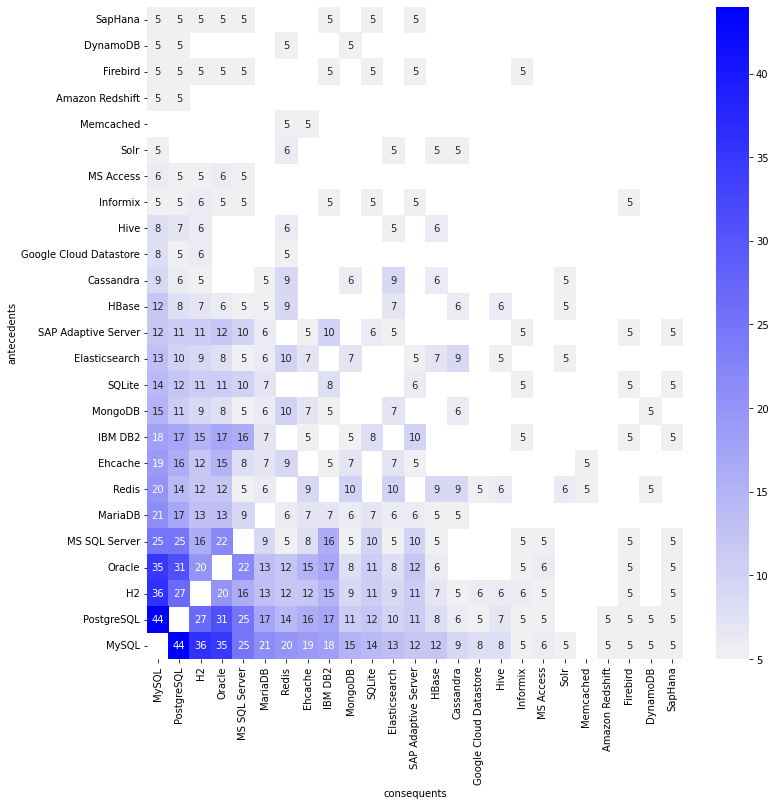

In [99]:
#Gráfico de heatmap gerado com todas as regras e a ordenação 
#Sugestão do João para este gráfico seria mostrar todas as regras sem filtrar pelo suporte
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

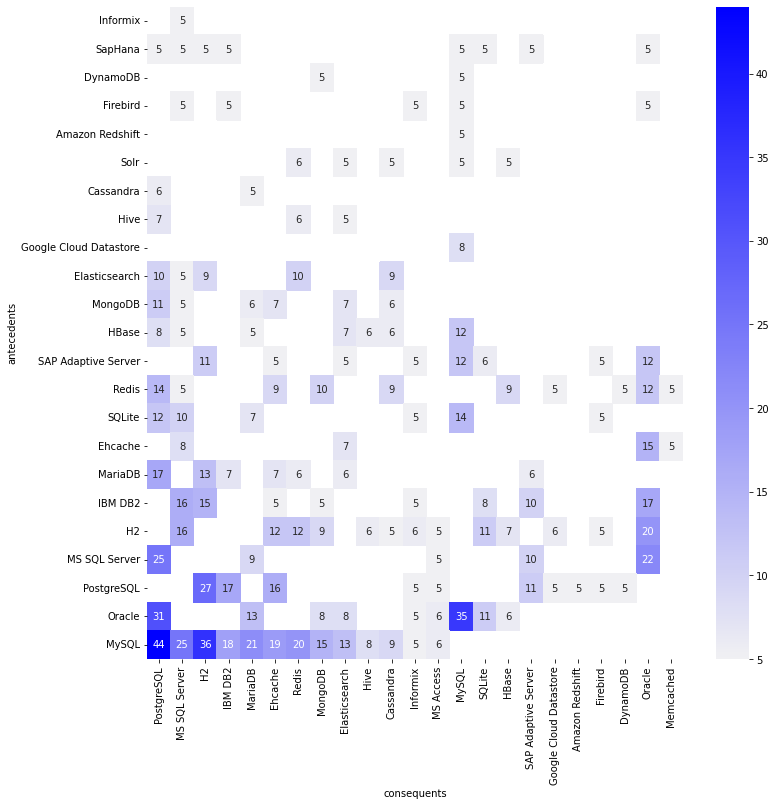

In [205]:
#teste Gerando um heatmap sem as repetições, mas com a ordenação do João
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

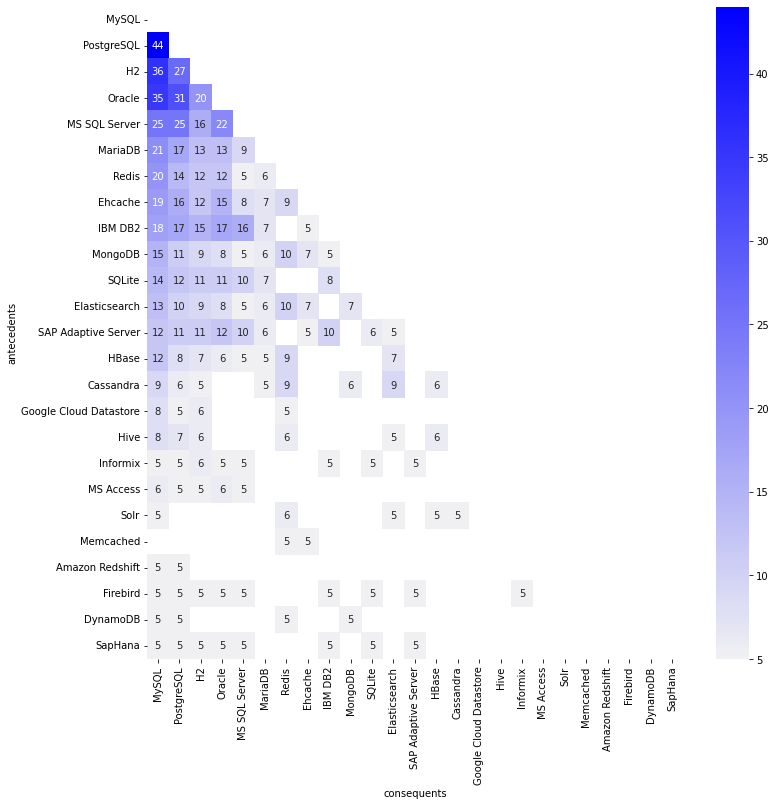

In [10]:
#teste Gerando um heatmap  as repetições,  com a ordenação do João, seguindo dica 
#Acho que a solução para isso pode ser gerar o heatmap completo com o eixo y invertido e
# usar o parâmetro mask=np.triu(np.ones_like(df)) no sns.heatmap
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True,
    mask=np.triu(np.ones_like(pivot)))
fig = plt.gcf()
fig.set_size_inches(12, 12)

import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 

#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs','antecedent_sup_abs'], ascending=[False, False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"]) 
#fig.title('Correlation of the most frequent databases')
fig.show()


In [126]:
#Teste para entender como a função pivot transforma o dataframe
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot.columns
#Invertendo a posição dos BDs
pivot = pivot.iloc[::-1]
pivot = pivot.reset_index()
pivot

In [129]:
import plotly.express as px 

fig = px.scatter(pivot, color_continuous_scale = ["silver","gray"])
fig.show()


In [271]:
#Teste gerando o grafico com todas as regras ordenadas com a função do João
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1cd['support_abs'] = orules1cd['support_abs'].astype(int)

fig = px.scatter(orules1cd, x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [218]:
#Teste mostrando as regras sem as repetiçoes invertidas e com ordenação feita pelo João.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

Obs sobre o gráfico acima:
Memcached só aparece como consequente
Solr só aparece como antecedente
Por isso, no caso de eliminarmos as repetições, os eixos nunca terão a mesma lista de BDs

In [219]:
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1cd['support_abs'] = orules1cd['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1cd.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

MySQL, PostgresSQL, H2, Oracle, MS SQL Server, Maria DB, Redis, Ehcache, IBM DB2, Mongo DB, SQLite

SQLite, Ehcache, IBM DB2,  Sap Adaptive Server, MS Access e MongoDB

v5 entrou: Maria DB, Redis
v5 saiu: Sap Adaptive Server, MS Access

v10 entrou: MySQL, PostgresSQL, H2, Oracle, MS SQL Server, Maria DB, Redis, Ehcache, IBM DB2, Mongo DB, SQLite
v10 saiu: 

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [254]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support'], ascending=[False])
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                             
MySQL         PostgreSQL               0.411168                81.0   
PostgreSQL    MySQL                    0.248731                49.0   
MySQL         H2                       0.411168                81.0   
H2            MySQL                    0.243655                48.0   
Oracle        MySQL                    0.218274                43.0   
...                                         ...                 ...   
MS Access     PostgreSQL               0.030457                 6.0   
MS SQL Server Elasticsearch            0.131980                26.0   
              Firebird                 0.131980                26.0   
              HBase                    0.131980                26.0   
MariaDB       HBase                    0.116751                23.0   

                             consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                       
MySQL         PostgreSQL               0.248731                49.0  0.223350   
PostgreSQL    MySQL                    0.411168                81.0  0.223350   
MySQL         H2                       0.243655                48.0  0.182741   
H2            MySQL                    0.411168                81.0  0.182741   
Oracle        MySQL                    0.411168                81.0  0.177665   
...                                         ...                 ...       ...   
MS Access     PostgreSQL               0.248731                49.0  0.025381   
MS SQL Server Elasticsearch            0.101523                20.0  0.025381   
              Firebird                 0.025381                 5.0  0.025381   
              HBase                    0.065990                13.0  0.025381   
MariaDB       HBase                    0.065990                13.0  0.025381   

                             support_abs  confidence      lift  leverage  \
antecedents   consequents                                                  
MySQL         PostgreSQL            44.0    0.543210  2.183925  0.121080   
PostgreSQL    MySQL                 44.0    0.897959  2.183925  0.121080   
MySQL         H2                    36.0    0.444444  1.824074  0.082558   
H2            MySQL                 36.0    0.750000  1.824074  0.082558   
Oracle        MySQL                 35.0    0.813953  1.979615  0.087918   
...                                  ...         ...       ...       ...   
MS Access     PostgreSQL             5.0    0.833333  3.350340  0.017805   
MS SQL Server Elasticsearch          5.0    0.192308  1.894231  0.011982   
              Firebird               5.0    0.192308  7.576923  0.022031   
              HBase                  5.0    0.192308  2.914201  0.016671   
MariaDB       HBase                  5.0    0.217391  3.294314  0.017676   

                             conviction  antecedent_len  consequente_len  
antecedents   consequents                                                 
MySQL         PostgreSQL       1.644670             1.0              1.0  
PostgreSQL    MySQL            5.770558             1.0              1.0  
MySQL         H2               1.361421             1.0              1.0  
H2            MySQL            2.355330             1.0              1.0  
Oracle        MySQL            3.164975             1.0              1.0  
...                                 ...             ...              ...  
MS Access     PostgreSQL       4.507614             1.0              1.0  
MS SQL Server Elasticsearch    1.112400             1.0              1.0  
              Firebird         1.206672             1.0              1.0  
              HBase            1.156394             1.0              1.0  
MariaDB       HBase            1.193457             1.0              1.0  

[278 rows x 12 columns]

In [255]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.096226,18.956522,0.411168,81.0,0.076142,15.000000,0.825137,2.006815,0.036577,NaN,1.0,1.0
Oracle,0.125709,24.764706,0.218274,43.0,0.068976,13.588235,0.658769,3.018079,0.041537,NaN,1.0,1.0
PostgreSQL,0.106368,20.954545,0.248731,49.0,0.067144,13.227273,0.705545,2.836579,0.040686,NaN,1.0,1.0
H2,0.114213,22.500000,0.243655,48.0,0.059898,11.800000,0.620112,2.545042,0.032070,NaN,1.0,1.0
MS SQL Server,0.130785,25.764706,0.131980,26.0,0.054046,10.647059,0.536780,4.067144,0.036785,NaN,1.0,1.0
IBM DB2,0.146818,28.923077,0.096447,19.0,0.051933,10.230769,0.508918,5.276676,0.037773,NaN,1.0,1.0
Ehcache,0.159898,31.500000,0.182741,36.0,0.048646,9.583333,0.347174,1.899812,0.019426,1.336165,1.0,1.0
MariaDB,0.155910,30.714286,0.116751,23.0,0.046410,9.142857,0.324694,2.781077,0.028208,1.329433,1.0,1.0
Redis,0.131345,25.875000,0.152284,30.0,0.045368,8.937500,0.474056,3.112965,0.025366,2.155223,1.0,1.0


In [249]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.411168,81.0,0.096226,18.956522,0.076142,15.000000,0.185185,2.006815,0.036577,1.131984,1.0,1.0
Oracle,0.218274,43.0,0.125709,24.764706,0.068976,13.588235,0.316005,3.018079,0.041537,1.438750,1.0,1.0
PostgreSQL,0.248731,49.0,0.106368,20.954545,0.067144,13.227273,0.269944,2.836579,0.040686,1.454370,1.0,1.0
H2,0.243655,48.0,0.114213,22.500000,0.059898,11.800000,0.245833,2.545042,0.032070,1.235423,1.0,1.0
MS SQL Server,0.131980,26.0,0.130785,25.764706,0.054046,10.647059,0.409502,4.067144,0.036785,3.469726,1.0,1.0
IBM DB2,0.096447,19.0,0.146818,28.923077,0.051933,10.230769,0.538462,5.276676,0.037773,3.542034,1.0,1.0
Ehcache,0.182741,36.0,0.159898,31.500000,0.048646,9.583333,0.266204,1.899812,0.019426,1.158931,1.0,1.0
MariaDB,0.116751,23.0,0.155910,30.714286,0.046410,9.142857,0.397516,2.781077,0.028208,1.829583,1.0,1.0
Redis,0.152284,30.0,0.131345,25.875000,0.045368,8.937500,0.297917,3.112965,0.025366,1.266139,1.0,1.0


In [259]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.043)]  
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.096226,18.956522,0.411168,81.0,0.076142,15.000000,0.825137,2.006815,0.036577,NaN,1.0,1.0
Oracle,0.125709,24.764706,0.218274,43.0,0.068976,13.588235,0.658769,3.018079,0.041537,NaN,1.0,1.0
PostgreSQL,0.106368,20.954545,0.248731,49.0,0.067144,13.227273,0.705545,2.836579,0.040686,NaN,1.0,1.0
H2,0.114213,22.500000,0.243655,48.0,0.059898,11.800000,0.620112,2.545042,0.032070,NaN,1.0,1.0
MS SQL Server,0.130785,25.764706,0.131980,26.0,0.054046,10.647059,0.536780,4.067144,0.036785,NaN,1.0,1.0
IBM DB2,0.146818,28.923077,0.096447,19.0,0.051933,10.230769,0.508918,5.276676,0.037773,NaN,1.0,1.0
Ehcache,0.159898,31.500000,0.182741,36.0,0.048646,9.583333,0.347174,1.899812,0.019426,1.336165,1.0,1.0
MariaDB,0.155910,30.714286,0.116751,23.0,0.046410,9.142857,0.324694,2.781077,0.028208,1.329433,1.0,1.0
Redis,0.131345,25.875000,0.152284,30.0,0.045368,8.937500,0.474056,3.112965,0.025366,2.155223,1.0,1.0


In [11]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
160,Firebird,MySQL,0.025381,5.0,0.411168,81.0,0.025381,5.0,1.000000,2.432099,0.014945,inf,1,1
161,SAP Adaptive Server,MySQL,0.060914,12.0,0.411168,81.0,0.060914,12.0,1.000000,2.432099,0.035868,inf,1,1
162,MS Access,MySQL,0.030457,6.0,0.411168,81.0,0.030457,6.0,1.000000,2.432099,0.017934,inf,1,1
163,SapHana,MySQL,0.025381,5.0,0.411168,81.0,0.025381,5.0,1.000000,2.432099,0.014945,inf,1,1
164,Amazon Redshift,MySQL,0.025381,5.0,0.411168,81.0,0.025381,5.0,1.000000,2.432099,0.014945,inf,1,1
172,MS SQL Server,MySQL,0.131980,26.0,0.411168,81.0,0.126904,25.0,0.961538,2.338557,0.072638,15.309645,1,1
177,IBM DB2,MySQL,0.096447,19.0,0.411168,81.0,0.091371,18.0,0.947368,2.304094,0.051715,11.187817,1,1
184,HBase,MySQL,0.065990,13.0,0.411168,81.0,0.060914,12.0,0.923077,2.245014,0.033781,7.654822,1,1
187,MariaDB,MySQL,0.116751,23.0,0.411168,81.0,0.106599,21.0,0.913043,2.220612,0.058595,6.771574,1,1
197,PostgreSQL,MySQL,0.248731,49.0,0.411168,81.0,0.223350,44.0,0.897959,2.183925,0.121080,5.770558,1,1


In [12]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
89,SapHana,PostgreSQL,0.025381,5.0,0.248731,49.0,0.025381,5.0,1.000000,4.020408,0.019068,inf,1,1
91,Firebird,PostgreSQL,0.025381,5.0,0.248731,49.0,0.025381,5.0,1.000000,4.020408,0.019068,inf,1,1
93,Amazon Redshift,PostgreSQL,0.025381,5.0,0.248731,49.0,0.025381,5.0,1.000000,4.020408,0.019068,inf,1,1
100,MS SQL Server,PostgreSQL,0.131980,26.0,0.248731,49.0,0.126904,25.0,0.961538,3.865777,0.094076,19.532995,1,1
109,SAP Adaptive Server,PostgreSQL,0.060914,12.0,0.248731,49.0,0.055838,11.0,0.916667,3.685374,0.040686,9.015228,1,1
111,IBM DB2,PostgreSQL,0.096447,19.0,0.248731,49.0,0.086294,17.0,0.894737,3.597207,0.062305,7.137056,1,1
119,MS Access,PostgreSQL,0.030457,6.0,0.248731,49.0,0.025381,5.0,0.833333,3.350340,0.017805,4.507614,1,1
120,Informix,PostgreSQL,0.030457,6.0,0.248731,49.0,0.025381,5.0,0.833333,3.350340,0.017805,4.507614,1,1
132,Hive,PostgreSQL,0.045685,9.0,0.248731,49.0,0.035533,7.0,0.777778,3.126984,0.024170,3.380711,1,1
134,MariaDB,PostgreSQL,0.116751,23.0,0.248731,49.0,0.086294,17.0,0.739130,2.971606,0.057255,2.879865,1,1


In [13]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
79,Informix,H2,0.030457,6.0,0.243655,48.0,0.030457,6.0,1.000000,4.104167,0.023036,inf,1,1
80,Firebird,H2,0.025381,5.0,0.243655,48.0,0.025381,5.0,1.000000,4.104167,0.019197,inf,1,1
82,SapHana,H2,0.025381,5.0,0.243655,48.0,0.025381,5.0,1.000000,4.104167,0.019197,inf,1,1
106,SAP Adaptive Server,H2,0.060914,12.0,0.243655,48.0,0.055838,11.0,0.916667,3.762153,0.040996,9.076142,1,1
116,MS Access,H2,0.030457,6.0,0.243655,48.0,0.025381,5.0,0.833333,3.420139,0.017960,4.538071,1,1
128,IBM DB2,H2,0.096447,19.0,0.243655,48.0,0.076142,15.0,0.789474,3.240132,0.052642,3.592640,1,1


In [14]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
64,SAP Adaptive Server,Oracle,0.060914,12.0,0.218274,43.0,0.060914,12.0,1.000000,4.581395,0.047618,inf,1,1
65,MS Access,Oracle,0.030457,6.0,0.218274,43.0,0.030457,6.0,1.000000,4.581395,0.023809,inf,1,1
67,Firebird,Oracle,0.025381,5.0,0.218274,43.0,0.025381,5.0,1.000000,4.581395,0.019841,inf,1,1
69,SapHana,Oracle,0.025381,5.0,0.218274,43.0,0.025381,5.0,1.000000,4.581395,0.019841,inf,1,1
86,IBM DB2,Oracle,0.096447,19.0,0.218274,43.0,0.086294,17.0,0.894737,4.099143,0.065243,7.426396,1,1
98,MS SQL Server,Oracle,0.131980,26.0,0.218274,43.0,0.111675,22.0,0.846154,3.876565,0.082867,5.081218,1,1
103,Informix,Oracle,0.030457,6.0,0.218274,43.0,0.025381,5.0,0.833333,3.817829,0.018733,4.690355,1,1


In [15]:
#rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
31,SapHana,MS SQL Server,0.025381,5.0,0.13198,26.0,0.025381,5.0,1.000000,7.576923,0.022031,inf,1,1
33,Firebird,MS SQL Server,0.025381,5.0,0.13198,26.0,0.025381,5.0,1.000000,7.576923,0.022031,inf,1,1
41,IBM DB2,MS SQL Server,0.096447,19.0,0.13198,26.0,0.081218,16.0,0.842105,6.380567,0.068489,5.497462,1,1
43,Informix,MS SQL Server,0.030457,6.0,0.13198,26.0,0.025381,5.0,0.833333,6.314103,0.021361,5.208122,1,1
45,MS Access,MS SQL Server,0.030457,6.0,0.13198,26.0,0.025381,5.0,0.833333,6.314103,0.021361,5.208122,1,1
47,SAP Adaptive Server,MS SQL Server,0.060914,12.0,0.13198,26.0,0.050761,10.0,0.833333,6.314103,0.042722,5.208122,1,1


In [16]:
rules7 =df[ (df['consequents'] .str.contains('MariaDB'))  & (df['confidence'] > 0.4) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
76,SAP Adaptive Server,MariaDB,0.060914,12.0,0.116751,23.0,0.030457,6.0,0.500000,4.282609,0.023345,1.766497,1,1
97,Cassandra,MariaDB,0.055838,11.0,0.116751,23.0,0.025381,5.0,0.454545,3.893281,0.018862,1.619289,1,1


In [18]:
rules8 = df[ (df['consequents'].str.contains('Redis')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
48,Solr,Redis,0.035533,7.0,0.152284,30.0,0.030457,6.0,0.857143,5.628571,0.025046,5.934010,1,1
54,Cassandra,Redis,0.055838,11.0,0.152284,30.0,0.045685,9.0,0.818182,5.372727,0.037182,4.662437,1,1
59,Memcached,Redis,0.035533,7.0,0.152284,30.0,0.025381,5.0,0.714286,4.690476,0.019970,2.967005,1,1
61,DynamoDB,Redis,0.035533,7.0,0.152284,30.0,0.025381,5.0,0.714286,4.690476,0.019970,2.967005,1,1


In [19]:
#rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
95,Memcached,Ehcache,0.035533,7.0,0.182741,36.0,0.025381,5.0,0.714286,3.908730,0.018887,2.860406,1,1
181,SAP Adaptive Server,Ehcache,0.060914,12.0,0.182741,36.0,0.025381,5.0,0.416667,2.280093,0.014249,1.401015,1,1
212,Elasticsearch,Ehcache,0.101523,20.0,0.182741,36.0,0.035533,7.0,0.350000,1.915278,0.016981,1.257321,1,1
214,MongoDB,Ehcache,0.101523,20.0,0.182741,36.0,0.035533,7.0,0.350000,1.915278,0.016981,1.257321,1,1
216,Oracle,Ehcache,0.218274,43.0,0.182741,36.0,0.076142,15.0,0.348837,1.908915,0.036254,1.255076,1,1
242,PostgreSQL,Ehcache,0.248731,49.0,0.182741,36.0,0.081218,16.0,0.326531,1.786848,0.035765,1.213506,1,1
252,MS SQL Server,Ehcache,0.131980,26.0,0.182741,36.0,0.040609,8.0,0.307692,1.683761,0.016491,1.180485,1,1
255,MariaDB,Ehcache,0.116751,23.0,0.182741,36.0,0.035533,7.0,0.304348,1.665459,0.014198,1.174810,1,1
257,Redis,Ehcache,0.152284,30.0,0.182741,36.0,0.045685,9.0,0.300000,1.641667,0.017857,1.167513,1,1
267,IBM DB2,Ehcache,0.096447,19.0,0.182741,36.0,0.025381,5.0,0.263158,1.440058,0.007756,1.109137,1,1


In [20]:
#rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10 = df[ (df['consequents'].str.contains('IBM DB2')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
12,SapHana,IBM DB2,0.025381,5.0,0.096447,19.0,0.025381,5.0,1.000000,10.368421,0.022933,inf,1,1
14,Firebird,IBM DB2,0.025381,5.0,0.096447,19.0,0.025381,5.0,1.000000,10.368421,0.022933,inf,1,1
24,Informix,IBM DB2,0.030457,6.0,0.096447,19.0,0.025381,5.0,0.833333,8.640351,0.022443,5.42132,1,1
25,SAP Adaptive Server,IBM DB2,0.060914,12.0,0.096447,19.0,0.050761,10.0,0.833333,8.640351,0.044886,5.42132,1,1


In [21]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MongoDB')) & (df['confidence'] > 0.5) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
39,DynamoDB,MongoDB,0.035533,7.0,0.101523,20.0,0.025381,5.0,0.714286,7.035714,0.021773,3.14467,1,1
53,Cassandra,MongoDB,0.055838,11.0,0.101523,20.0,0.030457,6.0,0.545455,5.372727,0.024788,1.97665,1,1


In [22]:
rules12 = df[ (df['consequents'] .str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
18,Firebird,SQLite,0.025381,5.0,0.111675,22.0,0.025381,5.0,1.000000,8.954545,0.022546,inf,1,1
21,SapHana,SQLite,0.025381,5.0,0.111675,22.0,0.025381,5.0,1.000000,8.954545,0.022546,inf,1,1
35,Informix,SQLite,0.030457,6.0,0.111675,22.0,0.025381,5.0,0.833333,7.462121,0.021979,5.329949,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [23]:
rules7a = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules7a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
186,MySQL,MariaDB,0.411168,81.0,0.116751,23.0,0.106599,21.0,0.259259,2.220612,0.058595,1.192386,1,1
187,MariaDB,MySQL,0.116751,23.0,0.411168,81.0,0.106599,21.0,0.913043,2.220612,0.058595,6.771574,1,1


In [24]:
rules3a = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules3a = df2[(df2['consequents'].str.contains('PostGIS'))]
rules3a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [36]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
186,MySQL,MariaDB,0.411168,81.0,0.116751,23.0,0.106599,21.0,0.259259,2.220612,0.058595,1.192386,1,1
187,MariaDB,MySQL,0.116751,23.0,0.411168,81.0,0.106599,21.0,0.913043,2.220612,0.058595,6.771574,1,1


In [37]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [25]:
rules13 = df2[(df2['lift'] > 10)] #>20
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,5.0,0.030457,6.0,0.025381,5.0,1.000000,32.833333,0.024608,inf,1,1
1,Informix,Firebird,0.030457,6.0,0.025381,5.0,0.025381,5.0,0.833333,32.833333,0.024608,5.847716,1,1
2,Firebird,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
4,SAP Adaptive Server,Firebird,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
5,SAP Adaptive Server,SapHana,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
6,Informix,SAP Adaptive Server,0.030457,6.0,0.060914,12.0,0.025381,5.0,0.833333,13.680556,0.023525,5.634518,1,1
7,SAP Adaptive Server,Informix,0.060914,12.0,0.030457,6.0,0.025381,5.0,0.416667,13.680556,0.023525,1.662074,1,1
8,Solr,Cassandra,0.035533,7.0,0.055838,11.0,0.025381,5.0,0.714286,12.792208,0.023397,3.304569,1,1
9,Cassandra,Solr,0.055838,11.0,0.035533,7.0,0.025381,5.0,0.454545,12.792208,0.023397,1.768190,1,1


rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

In [29]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,5.0,0.030457,6.0,0.025381,5.0,1.000000,32.833333,0.024608,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
2,Firebird,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
12,SapHana,IBM DB2,0.025381,5.0,0.096447,19.0,0.025381,5.0,1.000000,10.368421,0.022933,inf,1,1
14,Firebird,IBM DB2,0.025381,5.0,0.096447,19.0,0.025381,5.0,1.000000,10.368421,0.022933,inf,1,1
18,Firebird,SQLite,0.025381,5.0,0.111675,22.0,0.025381,5.0,1.000000,8.954545,0.022546,inf,1,1
21,SapHana,SQLite,0.025381,5.0,0.111675,22.0,0.025381,5.0,1.000000,8.954545,0.022546,inf,1,1
31,SapHana,MS SQL Server,0.025381,5.0,0.131980,26.0,0.025381,5.0,1.000000,7.576923,0.022031,inf,1,1
33,Firebird,MS SQL Server,0.025381,5.0,0.131980,26.0,0.025381,5.0,1.000000,7.576923,0.022031,inf,1,1
64,SAP Adaptive Server,Oracle,0.060914,12.0,0.218274,43.0,0.060914,12.0,1.000000,4.581395,0.047618,inf,1,1


In [50]:
rules14 = df2[(df2['lift'] > 8.9)] #>20(['support_abs'], ascending=[False])
#rules14 = rules14.sort_values(['lift'], ascending=['False'])
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.025381,5.0,0.030457,6.0,0.025381,5.0,1.000000,32.833333,0.024608,inf,1,1
1,Informix,Firebird,0.030457,6.0,0.025381,5.0,0.025381,5.0,0.833333,32.833333,0.024608,5.847716,1,1
2,Firebird,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
3,SapHana,SAP Adaptive Server,0.025381,5.0,0.060914,12.0,0.025381,5.0,1.000000,16.416667,0.023835,inf,1,1
4,SAP Adaptive Server,Firebird,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
5,SAP Adaptive Server,SapHana,0.060914,12.0,0.025381,5.0,0.025381,5.0,0.416667,16.416667,0.023835,1.670776,1,1
6,Informix,SAP Adaptive Server,0.030457,6.0,0.060914,12.0,0.025381,5.0,0.833333,13.680556,0.023525,5.634518,1,1
7,SAP Adaptive Server,Informix,0.060914,12.0,0.030457,6.0,0.025381,5.0,0.416667,13.680556,0.023525,1.662074,1,1
8,Solr,Cassandra,0.035533,7.0,0.055838,11.0,0.025381,5.0,0.714286,12.792208,0.023397,3.304569,1,1
9,Cassandra,Solr,0.055838,11.0,0.035533,7.0,0.025381,5.0,0.454545,12.792208,0.023397,1.768190,1,1


In [33]:
rules14_filter = rules14.to_excel('rules_filters_liftv5.xlsx', index=False)

In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)